# CT Image Reconstruction
The following assignment includes a basic implementation of image reconstruction methods - Radon Transform and Filtered back-projection. The test image used in the assignment is the Shepp-Logan phantom image. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

from skimage.io import imread
from skimage.transform import radon, rescale, iradon

c:\Users\Agita\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


## The Radon Transform
Creating a sinogram of the Shepp-Logan phantom [1] based on Radon Transform. The inverse Radon transform is used in computed tomography to reconstruct
a 2D image from the measured projections (the sinogram). 

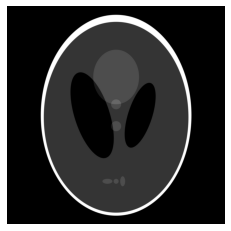

In [2]:
phantom = imread('shepp_logan_phantom.png')
plt.imshow(phantom)
plt.axis("off")
plt.show()

In [3]:
# Slicing image to get 2D dimension - common approach would be to take the middle slide (index) from a 3D.
phantom_sliced = phantom[:,:,0]

# Performing the radon transform on the image - with a default range of angels theta between 0 and 180 degrees
rt = radon(phantom_sliced, circle=False)

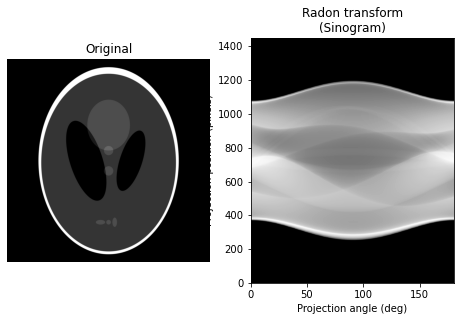

In [4]:
# Plotting the original grayscale image as well as the sinogram of the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(phantom, cmap=plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(rt, cmap=plt.cm.Greys_r,extent=(0, 180, 0, rt.shape[0]), aspect='auto')

ax1.axis('off')

# fig.tight_layout()
plt.show()


Creating two simple test images (ellipses) to examine how projection of the object changes in the sinogram depending on the object's size, position in the objective space etc. 


In [5]:
# Creating test "phantoms" 
my_phantom_1 = np.zeros((501, 501))
r, c = skimage.draw.ellipse(150, 150, 60, 25)
my_phantom_1[r,c] = 1

my_phantom_2= np.zeros((501, 501))
xxr, xxc = skimage.draw.ellipse(400, 300, 20, 100)
my_phantom_2[xxr,xxc] = 1

my_phantom_3 = my_phantom_1 + my_phantom_2


In [6]:
# Calculating the radon transform
radon_1 = radon(my_phantom_1, circle=False)
radon_2 = radon(my_phantom_2, circle=False)
radon_3 = radon(my_phantom_3, circle=False)

The Radon transform is a linear transform. This means that a sinogram of an image can be
decomposed into a sum of sinograms of the various objects in the image.
Following plots, graphically verifies the linearity of the Radon transform.

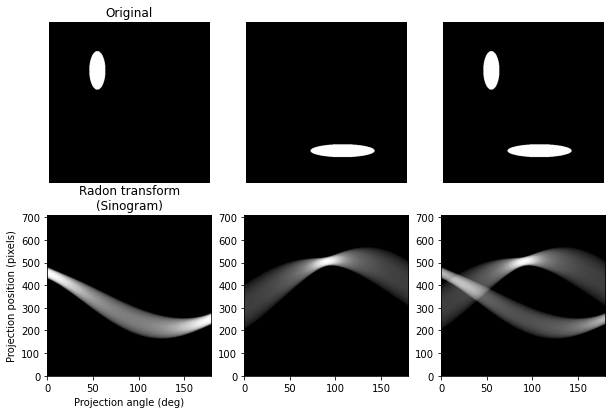

In [7]:
# Ploting the original grayscale image as well as the sinogram of the image
fig, ax = plt.subplots(2, 3,  figsize=(10, 6.5))

ax[0, 0].set_title("Original")
ax[0, 0].imshow(my_phantom_1, cmap=plt.cm.Greys_r)
ax[0, 1].imshow(my_phantom_2, cmap=plt.cm.Greys_r)
ax[0, 2].imshow(my_phantom_3, cmap=plt.cm.Greys_r)

ax[0, 0].axis('off')
ax[0, 1].axis('off')
ax[0, 2].axis('off')

ax[1,0].set_title("Radon transform\n(Sinogram)")
ax[1,0].set_xlabel("Projection angle (deg)")
ax[1,0].set_ylabel("Projection position (pixels)")

ax[1,0].imshow(radon_1, cmap=plt.cm.Greys_r,extent=(0, 180, 0, radon_1.shape[0]), aspect='auto')
ax[1,1].imshow(radon_2, cmap=plt.cm.Greys_r,extent=(0, 180, 0, radon_2.shape[0]), aspect='auto')
ax[1,2].imshow(radon_3, cmap=plt.cm.Greys_r,extent=(0, 180, 0, radon_3.shape[0]), aspect='auto')

plt.show()


## The Filtered Back-Projection
The filtered back-projection (FBP) is among the fastest methods (and most commonly used in CT scans) of performing the inverse Radon transform and reconstructing the image from the sinogram.

The quality of the reconstructed image depends on the projection quality. The following examples examine the difference between FBP on clean and noisy data, as well as full and segmented image. 

In [8]:
# Subsampling the problem
phantom_n = phantom_sliced

pn_radon = radon(phantom_n, theta = np.arange(90), circle=False)
pn_radon_2 = radon(phantom_n, theta = np.arange(180), circle=False)

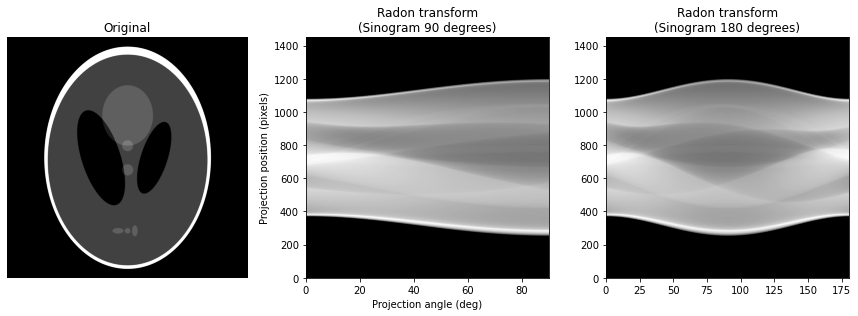

In [9]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 4.5))

ax1.set_title("Original")
ax1.imshow(phantom_n, cmap=plt.cm.Greys_r)
ax1.axis('off')

ax2.set_title("Radon transform\n(Sinogram 90 degrees)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(pn_radon, cmap=plt.cm.Greys_r,extent=(0, 90, 0, pn_radon.shape[0]), aspect='auto')

ax3.set_title("Radon transform\n(Sinogram 180 degrees)")
ax3.imshow(pn_radon_2, cmap=plt.cm.Greys_r,extent=(0, 180, 0, pn_radon_2.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

In [10]:
# # Adding Poisson noise to the sinogram
from skimage.util import random_noise

r_noisy = random_noise(pn_radon, mode="poisson") 
r_noisy_2 = random_noise(pn_radon_2, mode="poisson") 

In [11]:
# FBP on clean and noisy data

#90
I1 = iradon(pn_radon, np.arange(0,90))
I11 = iradon(r_noisy, np.arange(0,90))

# 180
I2 = iradon(pn_radon_2, np.arange(0,180))
I21 = iradon(r_noisy_2, np.arange(0,180))


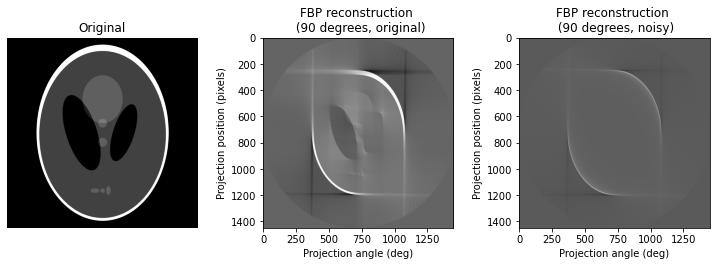

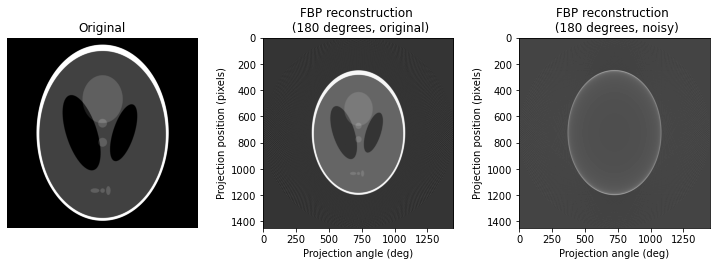

In [12]:
# Displaying reconstructions
#90
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(13, 3.5))
ax0.set_title("Original")
ax0.axis('off')

ax1.set_title("FBP reconstruction \n (90 degrees, original)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")

ax2.set_title("FBP reconstruction \n (90 degrees, noisy)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")

ax0.imshow(phantom_n, cmap = plt.cm.Greys_r)
ax1.imshow(I1, cmap = plt.cm.Greys_r)
ax2.imshow(I11, cmap = plt.cm.Greys_r)


#180
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(13, 3.5))
ax0.set_title("Original")
ax0.axis('off')

ax1.set_title("FBP reconstruction \n (180 degrees, original)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")

ax2.set_title("FBP reconstruction \n (180 degrees, noisy)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")

ax0.imshow(phantom_n, cmap = plt.cm.Greys_r)
ax1.imshow(I2, cmap = plt.cm.Greys_r)
ax2.imshow(I21, cmap = plt.cm.Greys_r)

In [13]:
# Unfiltered backprojection
#90
I3 = iradon(pn_radon, np.arange(0,90),filter_name=None)
I31 = iradon(r_noisy, np.arange(0,90),filter_name=None)

# 180
I4 = iradon(pn_radon_2, np.arange(0,180),filter_name=None)
I41 = iradon(r_noisy_2, np.arange(0,180),filter_name=None)

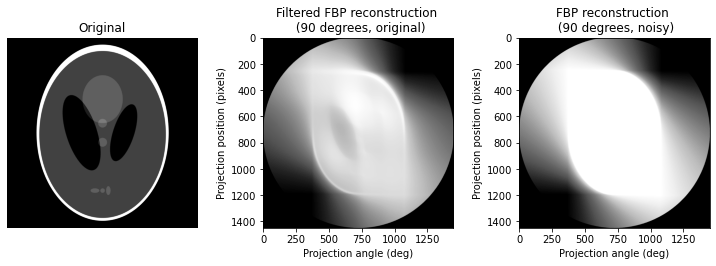

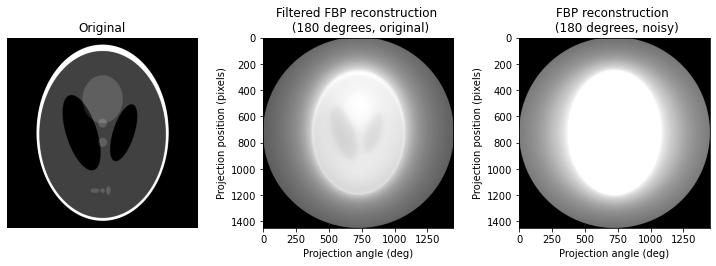

In [14]:
# Display reconstructions
#90
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(13, 3.5))

ax0.set_title("Original")
ax0.axis('off')
ax1.set_title("Filtered FBP reconstruction \n (90 degrees, original)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax2.set_title("FBP reconstruction \n (90 degrees, noisy)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")

ax0.imshow(phantom_n, cmap = plt.cm.Greys_r)
ax1.imshow(I3, cmap = plt.cm.Greys_r)
ax2.imshow(I31, cmap = plt.cm.Greys_r)


#180
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(13, 3.5))

ax0.set_title("Original")
ax0.axis('off')
ax1.set_title("Filtered FBP reconstruction \n (180 degrees, original)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax2.set_title("FBP reconstruction \n (180 degrees, noisy)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")

ax0.imshow(phantom_n, cmap = plt.cm.Greys_r)
ax1.imshow(I4, cmap = plt.cm.Greys_r)
ax2.imshow(I41, cmap = plt.cm.Greys_r)

The FBP is a linear reconstruction algorithm meaning that the complete reconstruction can be obtained as the sum of reconstruction from parts of the data. Following examples partitions the full data set into four partial sets and applies the FBP.

In [15]:
# Defining ranges of angles
range_1 = np.arange(45)
range_2 = np.arange(45,90)
range_3 = np.arange(90,135)
range_4 = np.arange(135,180)

# Partial sinograms
pnr_1 = radon(phantom_n, theta = range_1, circle=False)
pnr_2 = radon(phantom_n, theta = range_2, circle=False)
pnr_3 = radon(phantom_n, theta = range_3, circle=False)
pnr_4 = radon(phantom_n, theta = range_4, circle=False)


# Partial reconstructions
pr_1 = iradon(pnr_1, range_1)
pr_2 = iradon(pnr_2, range_2)
pr_3 = iradon(pnr_3, range_3)
pr_4 = iradon(pnr_4, range_4)


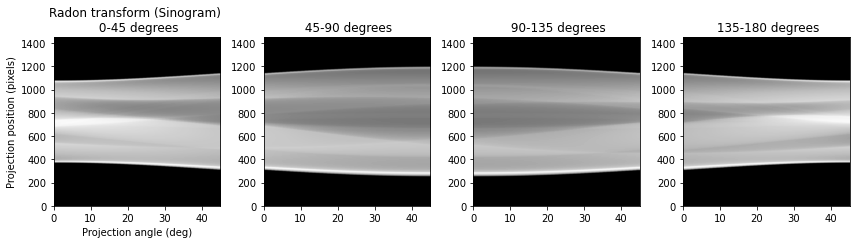

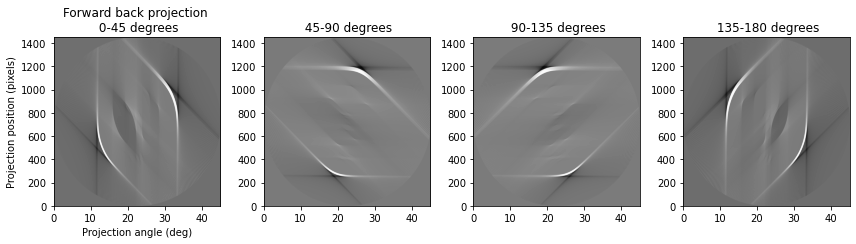

In [16]:
# Sinograms
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(12, 3.5))

ax1.set_title("Radon transform (Sinogram) \n 0-45 degrees")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax2.set_title("\n 45-90 degrees")
ax3.set_title("\n 90-135 degrees")
ax4.set_title("\n 135-180 degrees")

ax1.imshow(pnr_1, cmap=plt.cm.Greys_r,extent=(0, 45, 0, pnr_1.shape[0]), aspect='auto')
ax2.imshow(pnr_2, cmap=plt.cm.Greys_r,extent=(0, 45, 0, pnr_2.shape[0]), aspect='auto')
ax3.imshow(pnr_3, cmap=plt.cm.Greys_r,extent=(0, 45, 0, pnr_3.shape[0]), aspect='auto')
ax4.imshow(pnr_4, cmap=plt.cm.Greys_r,extent=(0, 45, 0, pnr_4.shape[0]), aspect='auto')


fig.tight_layout()
plt.show()

# FBP
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(12, 3.5))

ax1.set_title("Forward back projection \n 0-45 degrees")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax2.set_title("\n 45-90 degrees")
ax3.set_title("\n 90-135 degrees")
ax4.set_title("\n 135-180 degrees")

ax1.imshow(pr_1, cmap=plt.cm.Greys_r,extent=(0, 45, 0, pnr_1.shape[0]), aspect='auto')
ax2.imshow(pr_2, cmap=plt.cm.Greys_r,extent=(0, 45, 0, pnr_2.shape[0]), aspect='auto')
ax3.imshow(pr_3, cmap=plt.cm.Greys_r,extent=(0, 45, 0, pnr_3.shape[0]), aspect='auto')
ax4.imshow(pr_4, cmap=plt.cm.Greys_r,extent=(0, 45, 0, pnr_4.shape[0]), aspect='auto')


fig.tight_layout()
plt.show()

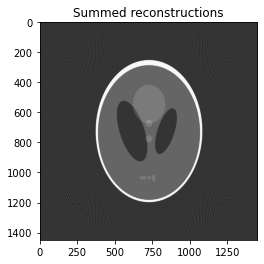

In [17]:
# Sum all the partial reconstructions - linearity proof
final_bp = pr_1 + pr_2 + pr_3 + pr_4
plt.imshow(final_bp, cmap = plt.cm.Greys_r)
plt.title("Summed reconstructions")
plt.show()

# References

[1] L. A. Shepp and B. F. Logan, “The Fourier reconstruction of a head section,” in IEEE Transactions on Nuclear Science, vol. 21, no. 3, pp. 21-43, June 1974. 
